# **Regression**

Septi Intan Amalia

H071191022

In [111]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Regression

In [112]:
data = pd.read_csv('avocado.csv')
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [113]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [114]:
data.shape

(18249, 14)

In [115]:
# label encoding
le = LabelEncoder()
data['Date'] = le.fit_transform(data['Date'])
data['type'] = le.fit_transform(data['type'])
data['year'] = le.fit_transform(data['year'])
data['region'] = le.fit_transform(data['region'])


In [116]:
data.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,15.481045,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


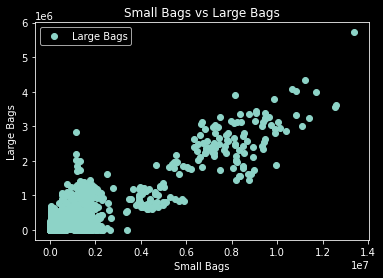

In [117]:
data.plot(x='Small Bags', y='Large Bags', style='o')
plt.title('Small Bags vs Large Bags')
plt.xlabel('Small Bags')
plt.ylabel('Large Bags')
plt.style.use('dark_background')
plt.show()

In [118]:
x = data['Small Bags'].values[:, np.newaxis]
y = data['Large Bags'].values

In [119]:
# splitting dataset into training dataset and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [120]:
#opsi 1 simpan ke dalam variabel agar lebih singkat
lr = LinearRegression()
lr.fit(x, y)
# #opsi 2
# LinearRegression().fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
print("Intercept :" + str(lr.intercept_))
print("Coefficient :" + str(lr.coef_))

Intercept :571.536736692382
Coefficient :[0.29510494]


In [122]:
X_test= [[4],[5]]

In [123]:
predict_result = lr.predict(X_test)

In [124]:
print(predict_result)

[572.71715644 573.01226137]


# Logistic Regression

In [125]:
import_data_iris = load_iris()

In [126]:
import_data_iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [127]:
data_iris = pd.DataFrame(data=np.c_[import_data_iris['data'], import_data_iris['target']], 
                         columns= import_data_iris['feature_names']+['target'])

In [128]:
data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


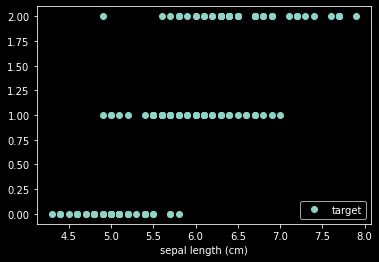

In [129]:
data_iris.plot(x="sepal length (cm)", y="target", style="o")

In [130]:
X =  data_iris.iloc[:, :-1]
y =  data_iris.iloc[:, -1]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [132]:
model_lrg = LogisticRegression()

model_lrg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
76                 6.8               2.8                4.8               1.4
25                 5.0               3.0                1.6               0.2
61                 5.9               3.0                4.2               1.5
139                6.9               3.1                5.4               2.1
27                 5.2               3.5                1.5               0.2
18                 5.7               3.8                1.7               0.3
84                 5.4               3.0                4.5               1.5
90                 5.5               2.6                4.4               1.2
107                7.3               2.9                6.3               1.8
134                6.1               2.6                5.6               1.4
120                6.9               3.2                5.7               2.3
117                7.7               3.8                6.7     

In [134]:
X_test.reset_index(drop=True, inplace=True)

In [135]:
prd = model_lrg.predict(X_test)

In [136]:
prd_df = pd.DataFrame(prd)

In [137]:
print(prd_df)

      0
0   1.0
1   0.0
2   1.0
3   2.0
4   0.0
5   0.0
6   1.0
7   1.0
8   2.0
9   2.0
10  2.0
11  2.0
12  0.0
13  0.0
14  2.0
15  1.0
16  2.0
17  2.0
18  1.0
19  2.0
20  1.0
21  0.0
22  2.0
23  1.0
24  2.0
25  1.0
26  2.0
27  1.0
28  0.0
29  1.0


In [138]:
result = pd.concat([X_test, prd_df], axis = 1, ignore_index = True)

In [139]:
result #done tinggal ubah nama kolomnya ;)

,0,1,2,3,4
0,6.8,2.8,4.8,1.4,1.0
1,5.0,3.0,1.6,0.2,0.0
2,5.9,3.0,4.2,1.5,1.0
3,6.9,3.1,5.4,2.1,2.0
4,5.2,3.5,1.5,0.2,0.0
5,5.7,3.8,1.7,0.3,0.0
6,5.4,3.0,4.5,1.5,1.0
7,5.5,2.6,4.4,1.2,1.0
8,7.3,2.9,6.3,1.8,2.0
9,6.1,2.6,5.6,1.4,2.0
